In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as PCA
import sys
%matplotlib inline

pd.set_option('display.mpl_style', 'default')

dfPolluters = pd.read_csv('honeypot_data/content_polluters_tweets.txt', sep='\t', names=['UserID', 'TweetID', 'Tweet', 'CreatedAt'], parse_dates=['CreatedAt'])
polluters = pd.read_csv('honeypot_data/content_polluters.txt', sep='\t', names=['UserID', 'CreatedAt', 'CollectedAt', 'NumerOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], parse_dates=['CreatedAt', 'CollectedAt'])

polluters = polluters.set_index('UserID')

dfLegit = pd.read_csv('honeypot_data/legitimate_users_tweets.txt', sep='\t', names=['UserID', 'TweetID', 'Tweet', 'CreatedAt'], parse_dates=['CreatedAt'])
legit = pd.read_csv('honeypot_data/legitimate_users.txt', sep='\t', names=['UserID', 'CreatedAt', 'CollectedAt', 'NumerOfFollowings', 'NumberOfFollowers', 'NumberOfTweets', 'LengthOfScreenName', 'LengthOfDescriptionInUserProfile'], parse_dates=['CreatedAt', 'CollectedAt'])

legit = legit.set_index('UserID')



/Users/reedmershon/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [181]:
dfPolluters['dayofweek'] = dfPolluters['CreatedAt'].dt.dayofweek
dfLegit['dayofweek'] = dfLegit['CreatedAt'].dt.dayofweek


In [187]:
len(dfLegit[:1])

#do all tweets together, and then take the total frequency? or do I take the freq and average them 

def tweetsPerUser(users, tweets):
    userGroupTweets = {}
    for uID in users.index[:3]:
        usersTData = tweets.loc[tweets['UserID'] == uID]
        #make this a dictionary and get the counts of these words
        userTweets = []
        for tweet in usersTData['Tweet'][:10]:
            splitT = tweet.split(' ')
            userTweets.append(splitT)
    return userGroupTweets

def freqPerDay(users, tweets):
    tweetsByDay = {}
    for uID in users.index:
        userData = tweets.loc[tweets['UserID'] == uID]
        #make this a dictionary and get the counts of these words
        #countDate = userData.groupby('dayofweek').count()
        #Dates = userData.groupby('dayofweek')
        dayCounts = userData['dayofweek'].value_counts()
        totalTweets = sum(dayCounts)
        dayFreq = []
        
        if totalTweets >= 20:
        
            for day in [0, 1, 2, 3, 4, 5, 6]:
                try:
                    dayFreq.append(dayCounts[day]/totalTweets)
                except Exception:
                    dayFreq.append(0.0)

            tweetsByDay[uID] = dayFreq
        
    return tweetsByDay
        
            
    #return dictionary of words

In [188]:
polFreqs = freqPerDay(polluters, dfPolluters)
legFreqs = freqPerDay(legit, dfLegit)

In [189]:
polDF = pd.DataFrame.from_dict(polFreqs, 'index')
legDF = pd.DataFrame.from_dict(legFreqs, 'index')

desPolDF = polDF.describe()
desLegDF = legDF.describe()

polMean = pd.Series.to_frame(desPolDF.loc[desPolDF.index[1]])
legMean = pd.Series.to_frame(desLegDF.loc[desLegDF.index[1]])
polSTD = pd.Series.to_frame(desPolDF.loc[desPolDF.index[2]])
legSTD = pd.Series.to_frame(desLegDF.loc[desLegDF.index[2]])

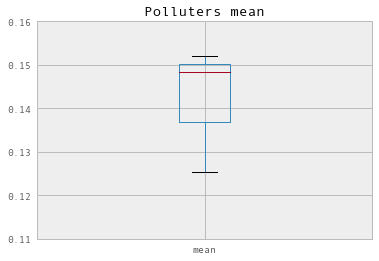

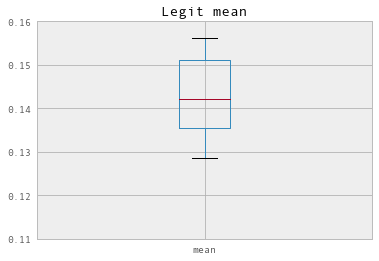

In [190]:
polMean.plot(kind='box', title='Polluters mean', ylim=(0.11, 0.16))
legMean.plot(kind='box', title='Legit mean', ylim=(0.11, 0.16))

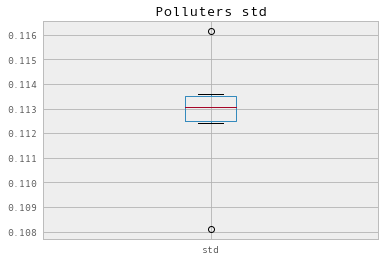

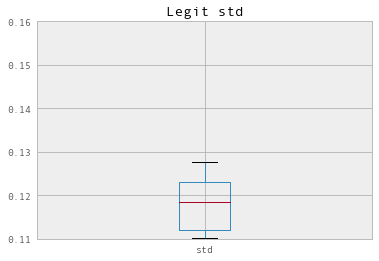

In [191]:
polSTD.plot(kind='box', title='Polluters std')
legSTD.plot(kind='box', title='Legit std', ylim=(0.11, 0.16))

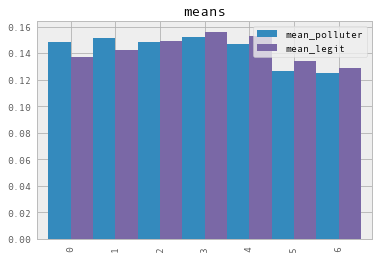

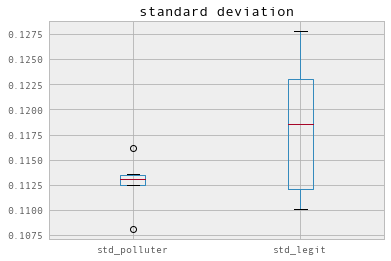

In [192]:
joinMean = polMean.join(legMean, lsuffix='_polluter', rsuffix='_legit')
joinSTD = polSTD.join(legSTD, lsuffix='_polluter', rsuffix='_legit')
##Original thinking is that legit users will twee more often on the weekend
##Polluters won't care what day of the week it is, and so thier means should be more evenly disributed
joinMean.plot(kind='bar', x=joinMean.index, width=1, title='means')
joinSTD.plot(kind='box', title='standard deviation')
#Need to make this a histogram

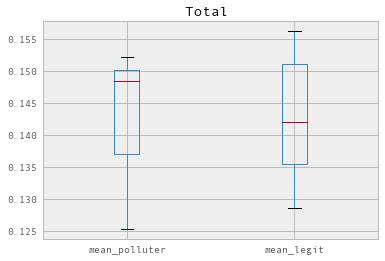

In [193]:
##Obviously this isn't the case. However, polluters seem to have a more consistent tweet schedule
##Thier frequency is much more simmilar and doesn't have a concise peak like the legit users do.

##Legit users seem to typically increse their tweets throughout the week, and actually tweet less during the weekend.
##Days 5 and 6 have the least amount. 

joinMean.plot(kind='box', title='Total ')

# Sentiment Analysis
## Using TextBlob and its language analysis tools to look at the tweets

In [175]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

def sentPerTweetUser(users, tweets): 
    usersSent = {}
    for uID in users.index:
        userData = tweets.loc[tweets['UserID'] == uID]
        userTweetSent = []
        for tweet in userData['Tweet']:
            blob = TextBlob(tweet, analyzer=NaiveBayesAnalyzer())
            
            userTweetSent.append(blob.sentiment)
        usersSent[uID] = userTweetSent
        
        

In [ ]:
a

In [295]:
##Just testing things out here. 

userData = dfPolluters.loc[dfPolluters['UserID'] == 6301]

userTweetSent = []
tweets = []

for tweet in userData['Tweet'][:100]:
    blob = TextBlob(tweet)
    a = blob.sentiment
    if a[1] < 0.2:
        userTweetSent.append(a)
        tweets.append(tweet)
    
#userTweetSent

In [252]:
tweets[:10]

['MELBOURNE ENQUIRY: Seeking a variety of acts for our end of year show. Payment is $120 per slot or $200 for 2.... http://bit.ly/4Ah3fF',
 'Come to "The Burlesque Bootcamp - Sydney" Saturday, 23 January 2010 at 10:00 until <br />Sunday, 24 January 2010 at... http://bit.ly/38simD',
 'The Burlesque Bootcamp – Coming to Sydney!:   The Burlesque Bootcamp – Heading to Sydney in 2010!  .. http://bit.ly/4vT7rC',
 'Just wants to remind performers thinking about booking into Bootcamp. There is a limit of 15 people, so if you... http://bit.ly/4BW2W1',
 'Burlesque Again Drawing Crowds  http://bit.ly/3jwvol http://bit.ly/4s2Lw7',
 'ATTN SYNDNEY : A must attend http://bit.ly/4tdWST http://bit.ly/4yldCq',
 '@CherryValens looking forward to having you with us!',
 'looking forward to Bijou opening night this Sunday in Melbourne http://www.bijoucabaret.com http://bit.ly/SED4w',
 'I posted 74 photos on Facebook in the album "The Ruby Revue Sydney - Nov 2009" http://bit.ly/gmTCp',
 'At the burlesque boo

In [219]:
userTweetSent[0][0]

-0.10416666666666666

In [285]:
def userSentiment(users, tweets):
    userSents = {}
    for uID in users.index:
        userData = tweets.loc[tweets['UserID'] == uID]
        userTweetSent = []
        polarityPos = 0
        polarityNet = 0
        polarityNeg = 0
        subPos = 0
        subNet = 0
        subNeg = 0
        if len(userData['Tweet']) > 0:
            for tweet in userData['Tweet']:
                    if type(tweet) is str:
                        blob = TextBlob(tweet)
                        sent = blob.sentiment
                        if sent[0] > 0.5:
                            polarityPos += 1 
                        elif sent[0] < -0.5:
                            polarityNeg += 1
                        elif 0.5 >= sent[0] >= -0.5:
                            polarityNet += 1

                        if sent[1] > 0.75:
                            subPos += 1
                        elif sent[1] < .25:
                            subNeg += 1
                        elif 0.75 >= sent[1] >= 0.25:
                            subNet += 1



            userSents[uID] = [polarityPos, polarityNet, polarityNeg, subPos, subNet, subNeg]
    return userSents
            

Above code has been changed to handle users that don't have any tweets. For some reason some accounts data were collected but no tweets were. There's no use in having their data

In [286]:
polSent = userSentiment(polluters, dfPolluters)
#Error reading in the legit users tweets... need to handle this in my function
legSent = userSentiment(legit, dfLegit)

In [287]:
len(polSent)

20645

In [288]:
polSentDF = pd.DataFrame.from_dict(polSent, 'index')
legSentDF = pd.DataFrame.from_dict(legSent, 'index')

desPolSentDF = polSentDF.describe()
desLegSentDF = legSentDF.describe()

polSentMean = pd.Series.to_frame(desPolSentDF.loc[desPolSentDF.index[1]])
legSentMean = pd.Series.to_frame(desLegSentDF.loc[desLegSentDF.index[1]])
polSentSTD = pd.Series.to_frame(desPolSentDF.loc[desPolSentDF.index[2]])
legSentSTD = pd.Series.to_frame(desLegSentDF.loc[desLegSentDF.index[2]])



In [273]:
##Simple function to find accounts that had no tweets collected

def userZeroTweets(users, tweets):
    zerotweeters = 0
    for uID in users.index:
        userData = tweets.loc[tweets['UserID'] == uID]
        
        if len(userData) == 0:
            zerotweeters += 1
    
    return zerotweeters


count = userZeroTweets(polluters, dfPolluters)    

In [274]:
## 1500 polluter accounts that dont have any tweets for them
## just throw these out 

count

1578

In [257]:
userData = dfPolluters.loc[dfPolluters['UserID'] == 964981]

userTweetSent = []
tweets = []

for tweet in userData['Tweet']:
    tweets.append(tweet)

tweets

[]

In [292]:
#need to actually show my sentiment results

desPolSentDF

,0,1,2,3,4,5
count,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000,20645.000000
mean,10.283991,101.389876,1.365173,16.620102,42.816517,53.602422
std,13.440840,75.088967,3.232677,20.936798,39.300459,48.162509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,2.000000,6.000000,8.000000
50%,6.000000,109.000000,0.000000,10.000000,35.000000,44.000000
75%,15.000000,178.000000,2.000000,23.000000,72.000000,88.000000
max,200.000000,200.000000,198.000000,200.000000,200.000000,200.000000


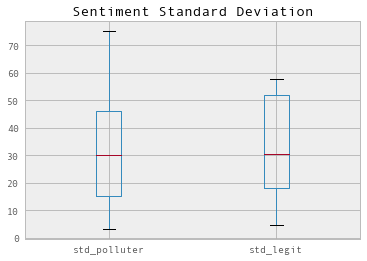

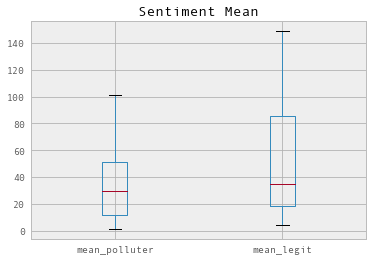

In [299]:
joinMeanSent = polSentMean.join(legSentMean, lsuffix='_polluter', rsuffix='_legit')
joinSTDSent = polSentSTD.join(legSentSTD, lsuffix='_polluter', rsuffix='_legit')

joinSTDSent.plot(kind='box', title='Sentiment Standard Deviation')
joinMeanSent.plot(kind='box', title='Sentiment Mean')

#These plots are just on the raw numbers. Doing freq will potentially improve the results shown


In [323]:
def sentFreq(dataFrame):
    newData = {}
    #get the last three columns. Since the last three are all the subjective scores, should be just as many as the 
    dataFrame['Total Tweets'] = dataFrame.iloc[:, -4:-1].sum(axis=1)
    tempDF = dataFrame
    for index, row in tempDF.iterrows():
        polPosF = row[0]/row[6]
        polNetF = row[1]/row[6]
        polNegF = row[2]/row[6]
        subPosF = row[3]/row[6]
        subNetF = row[4]/row[6]
        subNegF = row[5]/row[6]
        newData[index] = [polPosF, polNetF, polNegF, subPosF, subNetF, subNegF]

    return newData
        
        
        
polSentFreq = pd.DataFrame.from_dict(sentFreq(polSentDF), 'index')
legSentFreq = pd.DataFrame.from_dict(sentFreq(legSentDF), 'index')

In [328]:
desPSF = polSentFreq.describe()
desLSF = legSentFreq.describe()

psfMean = pd.Series.to_frame(desPSF.loc[desPSF.index[1]])
psfSTD = pd.Series.to_frame(desPSF.loc[desPSF.index[2]])

lsfMean = pd.Series.to_frame(desLSF.loc[desLSF.index[1]])
lsfSTD = pd.Series.to_frame(desLSF.loc[desLSF.index[2]])

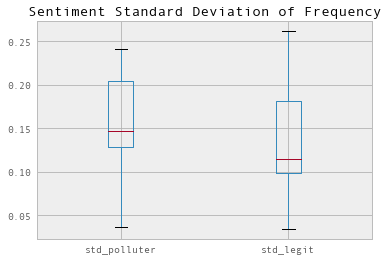

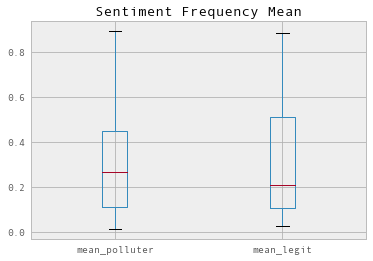

In [329]:
joinMeanSF = psfMean.join(lsfMean, lsuffix='_polluter', rsuffix='_legit')
joinSTDSF = psfSTD.join(lsfSTD, lsuffix='_polluter', rsuffix='_legit')

joinSTDSF.plot(kind='box', title='Sentiment Standard Deviation of Frequency')
joinMeanSF.plot(kind='box', title='Sentiment Frequency Mean')

In [293]:
#nearest neighbor algo

#FIrst string would be a n-long vector or list
#What the user is

#then take data not trained on and see how often it is correctly predicted

#If this takes a long time, goto decision tree

# MACHINE LEARNING
## NEAREST NEIGHBOR

I will be using the scikit learn supervised learning toolkit to run some machine learning algorithms on the data sets. First starting with Nearest neighbor. Then looking at how well it is able to determine polluters from legit users. 

In [435]:
from sklearn.neighbors import KNeighborsClassifier as KNClass

## Probably need to re-do my function so that i can get a good look at the sentiment scores? or I should average them. 

## First well look at the freqency since its just a small array of numbers. Can then move on. 

#chose the range of numbers to look at
def machLearnData(dframe1, dframe2, rng=0):
    data = []
    #0 = polluters
    #1 = legit
    classify = []
    for index, row in dframe1.iterrows():
        usrList = [row[0], row[1], row[2], row[3], row[4], row[5]]
            
        data.append(usrList)
        classify.append(0)
        
    for index, row in dframe2.iterrows():
        usrList = [row[0], row[1], row[2], row[3], row[4], row[5]]
            
        data.append(usrList)
        classify.append(1)
        
    return data, classify
        

In [436]:
data, cls = machLearnData(polSentFreq[:1000], legSentFreq[:1000])

print(polSentFreq[1000:1001])

              0     1      2     3      4      5
17206096  0.075  0.92  0.005  0.12  0.495  0.385


In [479]:
neigh = KNClass(n_neighbors=21)
neigh.fit(data, cls)

neigh.predict([0.075, 0.92, 0.005, 0.12, 0.495, 0.385])

/Users/reedmershon/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0])

In [480]:
# run MachLearnData on new dataset of users
preData, preCls = machLearnData(polSentFreq[1000:2000], legSentFreq[1000:2000])
#take the new lists and then use predict on them
finCls = neigh.predict(preData)
#compare the new class list to original and see if there is any difference and how many were correctly predicted

def predTable(fCls):
    
    split = int(len(fCls)/2)
    
    cls = list(fCls)
    #true positive is going to be spammers that are predicted as such
    truePos = cls[:split].count(0)
    #false negative will be spammers that are predicted as nonpolluters
    falseNeg = cls[:split].count(1)

#     polCounts = np.unique(cls[:split], return_counts=True)
    
    falsePos = cls[split:].count(0)
    trueNeg = cls[split:].count(1)
    
    acc = (truePos + trueNeg) / int(len(fCls))
    
    precision = truePos / (truePos + falsePos)
    
    recall = truePos / (truePos + falseNeg)
    
    f1 = 2*(recall * precision) / (recall + precision)
    
    fpr = falsePos / (falsePos + trueNeg)
    
    return {'polluter': [truePos, falseNeg], 'legit': [falsePos, trueNeg]}, acc, precision, recall, f1, fpr

pred, predAcc, predPrec, predRec, predF1, predFPR = predTable(finCls)

In [462]:
#write function to automate the predictions

#true pos, true neg, fals pos, fals neg
#pos hit is a bot
predDF = pd.DataFrame.from_dict(pred, orient='index')
predDF, predAcc, predPrec, predRec, predF1, predFPR

(            0    1
 polluter  775  225
 legit     388  612,
 0.6935,
 0.6663800515907137,
 0.775,
 0.7165973185390663,
 0.388)

In [463]:
preData, preCls = machLearnData(polSentFreq[2000:3000], legSentFreq[2000:3000])
#take the new lists and then use predict on them
finCls = neigh.predict(preData)

pred2 = predTable(finCls)
print(pred2)
pred2DF = pd.DataFrame.from_dict(pred2[0], orient='index')
pred2DF

({'polluter': [765, 235], 'legit': [408, 592]}, 0.6785, 0.6521739130434783, 0.765, 0.7040957202024851, 0.408)


,0,1
polluter,765,235
legit,408,592


In [481]:
from sklearn.metrics import roc_curve, auc

#calculate accuracy, precision, f1, recal

#acc = trueppos + trueneg / total

#precision = truepos / truepos + falsePos

#recal = TruePos / truepos + falseNeg

#f1 = 2*(Recall * Precision)/(Recall + Precision)

probaCls = neigh.predict_proba(preData)

#pred_proba returns a list of 2 numbers, and they are the probabilities of pos or neg results. just care about the first one. 

#tuple of actual classification, and the pos probability

#would then need to walk through each point and plot the truePos rate(recall) and the falsePos rate
#calculate area under this curve

#ROC scores are the truePos probabilities
#gives back fpr and tpr then you could plot the scores

#another funtion will give the area under the graph 

#need to duplicate previous function to hand the predict_proba function data

#this function will take in the predictproba function. Then parse out the results based on the a probability cutoff
def probaTable(fCls, posL=0, posCut=0.5):
    clsArray = []
    actualCls = []
    
    pos = []
    
    count = 0
    for line in fCls:
        if line[0] >= posCut:
            clsArray.append(0)
        else:
            clsArray.append(1)
        pos.append(line[0])
            
        if count < len(fCls)/2:
            actualCls.append(0)
            count += 1
        else:
            actualCls.append(1)
            
    #print(len(actualCls), len(fCls))
            
    #classTuple = zip(actualCls, fCls)

    fpr, tpr, thresholds = roc_curve(actualCls, pos, pos_label=posL)
    
    roc_auc = auc(fpr, tpr)
    
    #return {'polluter': [truePos, falseNeg], 'legit': [falsePos, trueNeg]}, acc, precision, recall, f1, fpr
    
    return fpr, tpr, thresholds, roc_auc

In [482]:
fpr, tpr, thresh, roc_auc = probaTable(probaCls)


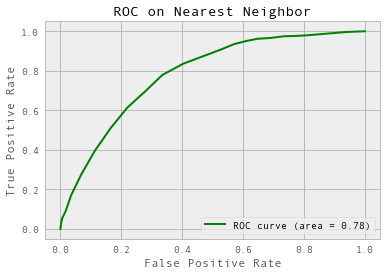

In [483]:
#plot the roc curve

plt.figure()

plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Nearest Neighbor')
plt.legend(loc="lower right")
plt.show()

In [489]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data, cls)

preGNB = gnb.predict(preData)

pred, predAcc, predPrec, predRec, predF1, predFPR = predTable(preGNB)

In [491]:
pred2DF = pd.DataFrame.from_dict(pred, orient='index')
pred2DF

,0,1
polluter,762,238
legit,571,429


In [492]:
gnbProba = gnb.predict_proba(preData)

fpr, tpr, thresh, roc_auc = probaTable(gnbProba)



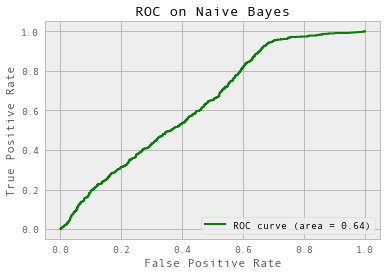

In [494]:

plt.figure()

plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [495]:
#divide data up into folds so that the expriment can be done multiple times

#make in general function to do the predictions

#divide data into sets, 

#include diagrams of gettings numbers from the data

In [501]:
polSentFreq.rename(columns={0:'Positive Polarity Freq', 1:'Neutral Polarity Freq', 2:'Negative Polarity Freq', +\
                            3:'Subjective Freq', 4:'Neutral Freq', 5:'Objective Freq'}, inplace=True)
legSentFreq.rename(columns={0:'Positive Polarity Freq', 1:'Neutral Polarity Freq', 2:'Negative Polarity Freq', +\
                            3:'Subjective Freq', 4:'Neutral Freq', 5:'Objective Freq'}, inplace=True)

In [503]:
polDF.rename(columns={0:'Mon.', 1:'Tues.', 2:'Wed.', 3:'Thur.', 4:'Fri.', 5:'Sat.', 6:'Sun.'}, inplace=True)
legDF.rename(columns={0:'Mon.', 1:'Tues.', 2:'Wed.', 3:'Thur.', 4:'Fri.', 5:'Sat.', 6:'Sun.'}, inplace=True)

In [510]:
polSentFreq.to_csv('created_data/polSentFreq.csv', encoding='utf-8')
legSentFreq.to_csv('created_data/legSentFreq.csv', encoding='utf-8')
polDF.to_csv('created_data/polDOWeek.csv', encoding='utf-8')
legDF.to_csv('created_data/legDOWeek.csv', encoding='utf-8')